## topico 1

Isso é composto por

1. xxfsfs
2. dsdnsjdns

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)


# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

'''
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
'''

predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[56  0]
 [ 3 84]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.97      0.98        87

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Neural_Network(object):
  def __init__(self, layers):
  #parameters
    self.inputSize = layers[0]
    self.hiddenSize = layers[1]
    self.outputSize = layers[2]

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self, value):
    print("Predicted data based on trained weights: ")
    print("Input (scaled): \n" + str(value))
    print("Output: \n" + str(self.forward(value)))

In [4]:
xAll = X_train
y = y_train

y = np.array([y_train]).reshape((426,1))
y
# X = (hours studying, hours sleeping), y = score on test
#xAll = np.array(([2, 9, 7], [1, 5, 8], [3, 6, 9], [5, 10, 15]), dtype=float) # input data
#y = np.array(([5], [10], [15]), dtype=float) # output


array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [17]:
# scale units
xAll = xAll/np.amax(xAll, axis=0) # scaling input data
y = y/100 # scaling output data (max test score is 100)

In [18]:
# scale units
xAll = xAll/np.amax(xAll, axis=0) # scaling input data
y = y/10 # scaling output data (max test score is 100)



# split data
X = np.split(xAll, [426])[0] # training data
xPredicted = X_test
X

array([[-0.06142816,  0.12536667, -0.06107732, ...,  0.26738034,
         0.21520067,  0.13654831],
       [-0.25538391, -0.19254527, -0.25459937, ..., -0.38517406,
        -0.07207052, -0.0150784 ],
       [-0.388169  , -0.31069837, -0.37905053, ..., -0.15757281,
         0.02599608,  0.23456053],
       ...,
       [-0.0408248 ,  0.44578186, -0.05623927, ..., -0.31112494,
        -0.05101818, -0.15085679],
       [-0.14810435, -0.21757771, -0.14538294, ..., -0.36819393,
         0.06357052, -0.09139755],
       [ 0.06148153,  0.16141338,  0.11062204, ...,  0.75541861,
        -0.0051827 ,  0.35370382]])

In [19]:
from IPython import display

x_vec = [] # array to store iteration count
y_data = [] # array to store loss values
plt.show()
NN = Neural_Network([30,10,1])

<Figure size 432x288 with 0 Axes>

# 99

Input (scaled): 
[[-0.06142816  0.12536667 -0.06107732 ...  0.26738034  0.21520067
   0.13654831]
 [-0.25538391 -0.19254527 -0.25459937 ... -0.38517406 -0.07207052
  -0.0150784 ]
 [-0.388169   -0.31069837 -0.37905053 ... -0.15757281  0.02599608
   0.23456053]
 ...
 [-0.0408248   0.44578186 -0.05623927 ... -0.31112494 -0.05101818
  -0.15085679]
 [-0.14810435 -0.21757771 -0.14538294 ... -0.36819393  0.06357052
  -0.09139755]
 [ 0.06148153  0.16141338  0.11062204 ...  0.75541861 -0.0051827
   0.35370382]]
Actual Output: 
[[0.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [0.e+00]
 [0.e+00]
 [0.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [0.e+00]
 [1.e-05]
 [0.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [0.e+00]
 [0.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [0.e+00]
 [1.e-05]
 [0.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [0.e+00]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [1.e-05]
 [0.e+00]
 [0.e+00]
 [1.e-05]
 [0.e+00]
 [0.e+00]
 [0.e+00]
 [0.e+00]
 [0.e+00]
 [1.e-05]
 [0.e+00]
 [1.e-05]


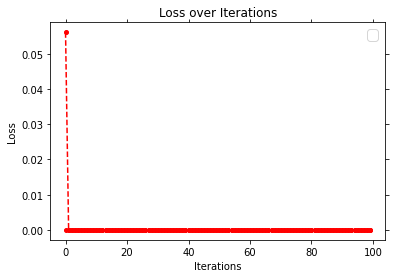

In [21]:
for i in range(100): # trains the NN 1,000 times
  display.clear_output(wait=True)
  display.display(plt.gcf())
    
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  loss = str(np.mean(np.square(y - NN.forward(X))))
  accuracy = 100 - float(loss)
  print("Loss: \n" +  loss ) # mean sum squared loss
  print("\n")
  
  x_vec.append(i)
  y_data.append(np.round(float(loss), 6))
  plt.cla()
  plt.title("Loss over Iterations")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend(['Erro'], fontsize=14)
  plt.plot(x_vec, y_data, linestyle='--', marker='o', color = 'red', markersize = 4)
  plt.pause(.0001)
  NN.train(X, y)

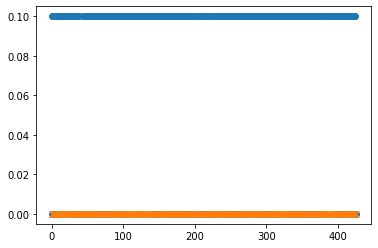

In [14]:
plt.figure()
plt.plot(y, 'o')
plt.plot(NN.forward(X), 'x')

In [15]:
NN.saveWeights()
NN.predict(xPredicted)

Predicted data based on trained weights: 
Input (scaled): 
[[-0.6599488  -0.49864758 -0.68466022 ... -0.04847066 -0.50258597
  -0.72278408]
 [ 1.5601086  -0.09566014  1.5664079  ...  1.26744257  0.13236406
   0.84435917]
 [-0.5123235   0.05987887 -0.52615743 ... -0.07685017 -0.34865869
  -0.12680482]
 ...
 [-0.48109507  1.78023461 -0.41898327 ...  0.48924644  0.52840612
   2.0180565 ]
 [-0.8899036  -1.49551125 -0.93062699 ... -1.09955821 -0.23642005
  -0.39740265]
 [ 1.82696972  0.32146721  1.77993498 ...  0.71926986  0.53642317
  -1.11623001]]
Output: 
[[5.12677206e-22]
 [8.36926314e-52]
 [6.40704245e-41]
 [4.57927619e-57]
 [8.11696288e-35]
 [4.02384208e-39]
 [2.67894261e-55]
 [1.60969787e-50]
 [1.74272770e-25]
 [4.10033548e-41]
 [6.29649851e-38]
 [1.49280891e-45]
 [1.82936248e-31]
 [3.42654119e-39]
 [6.29331359e-46]
 [7.01603846e-20]
 [1.41916056e-46]
 [3.19709157e-35]
 [3.75325756e-37]
 [4.48718299e-26]
 [1.31164908e-43]
 [4.03535351e-49]
 [6.42227775e-25]
 [2.28616131e-42]
 [5.0054